# Super market analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calmap
import seaborn as sns

In [2]:
df = pd.read_csv("supermarket_sales.csv")

In [3]:
df.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [4]:
df.shape

(1000, 17)

In [5]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [12]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


<Figure size 1200x600 with 0 Axes>

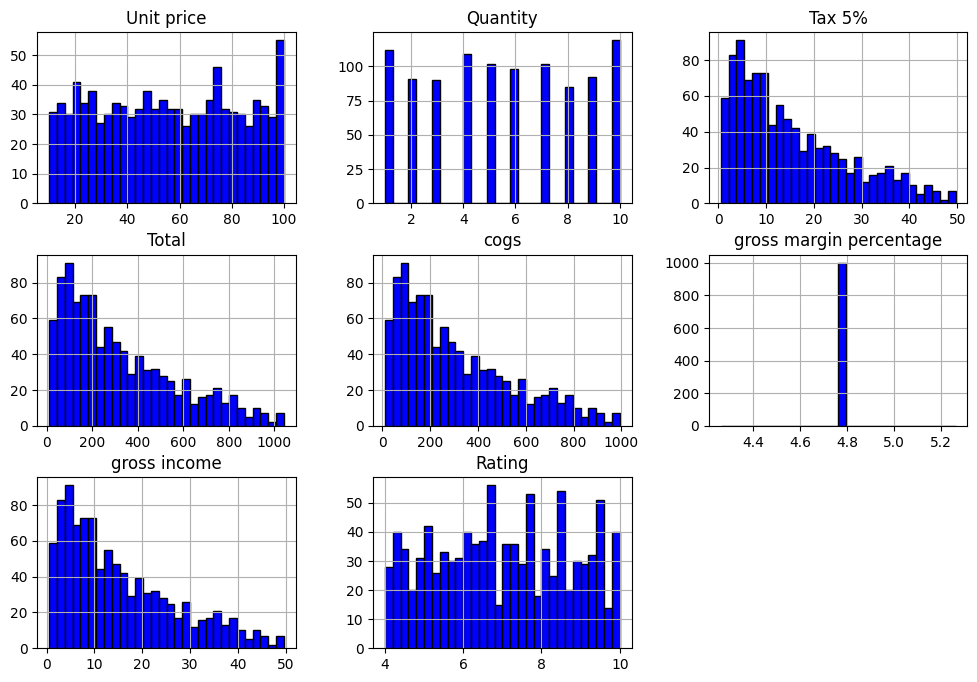

In [14]:
# visualizing the numberical value
plt.figure(figsize = (12,6))
df.hist(bins = 30, figsize = (12,8), color = "blue", edgecolor = "black")
plt.show()

In [18]:
df["gender_encoded"] = df["Gender"].map({"Male": 0, "Female": 1})


In [20]:
# Compute Correlation
correlation_matrix = df[["gender_encoded", "gross income"]].corr()


In [21]:
# Display Correlation Matrix
print(correlation_matrix)

                gender_encoded  gross income
gender_encoded        1.000000      0.049451
gross income          0.049451      1.000000


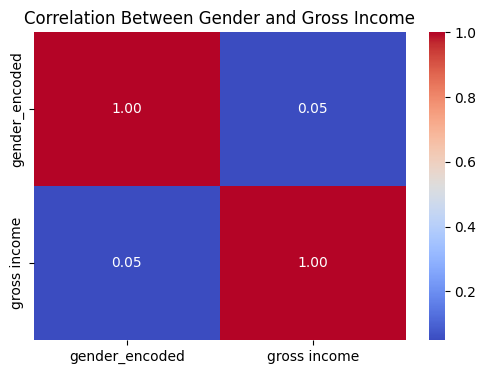

In [22]:
# Heatmap for Visualization
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Gender and Gross Income")
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_4176\2398038829.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gender", y="gross income", data=df, palette="coolwarm")


<Axes: xlabel='Gender', ylabel='gross income'>

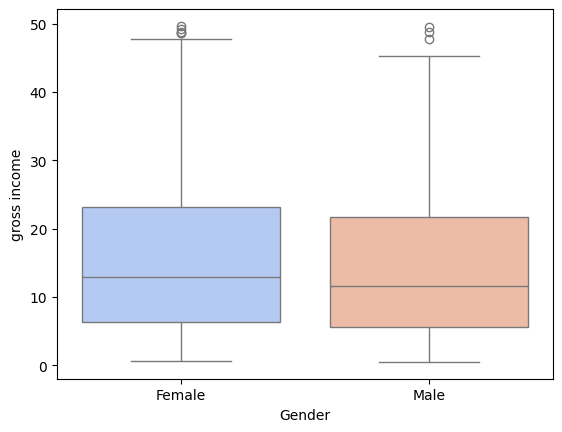

In [27]:
sns.boxplot(x="Gender", y="gross income", data=df, palette="coolwarm")


C:\Users\asus\AppData\Local\Temp\ipykernel_4176\1694906898.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Gender", y="gross income", data=df, palette="coolwarm")


<Axes: xlabel='Gender', ylabel='gross income'>

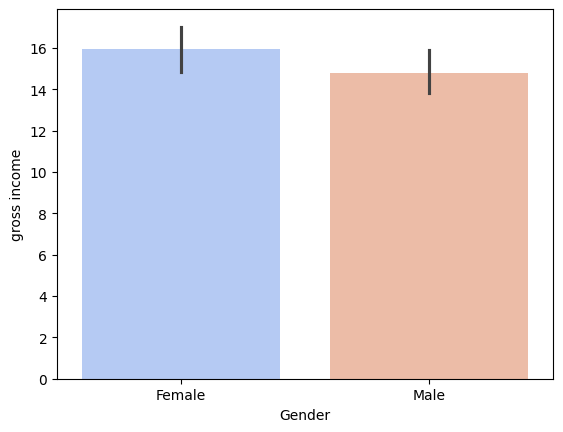

In [28]:
sns.barplot(x="Gender", y="gross income", data=df, palette="coolwarm")


In [29]:
# convert the product line into numerical value
df1 = pd.get_dummies(data = df, columns = ['Product line'])

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Invoice ID                           1000 non-null   object 
 1   Branch                               1000 non-null   object 
 2   City                                 1000 non-null   object 
 3   Customer type                        1000 non-null   object 
 4   Gender                               1000 non-null   object 
 5   Unit price                           1000 non-null   float64
 6   Quantity                             1000 non-null   int64  
 7   Tax 5%                               1000 non-null   float64
 8   Total                                1000 non-null   float64
 9   Date                                 1000 non-null   object 
 10  Time                                 1000 non-null   object 
 11  Payment                        

C:\Users\asus\AppData\Local\Temp\ipykernel_4176\774448298.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Product line", y="Rating", data=df, palette="coolwarm")


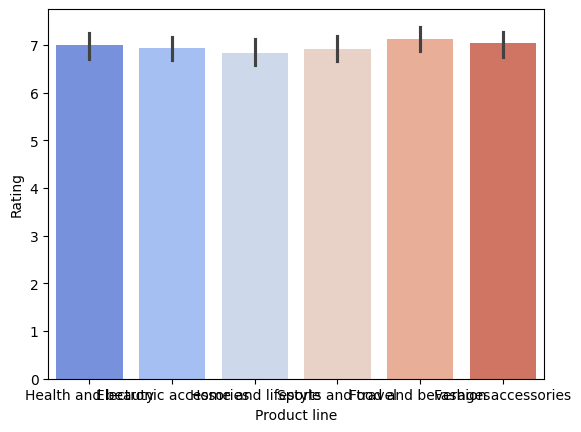

In [35]:
# Improved Bar Plot
ax = sns.barplot(x="Product line", y="Rating", data=df, palette="coolwarm")


C:\Users\asus\AppData\Local\Temp\ipykernel_4176\4198883164.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="Product line", y="Rating", data=df, palette="coolwarm")


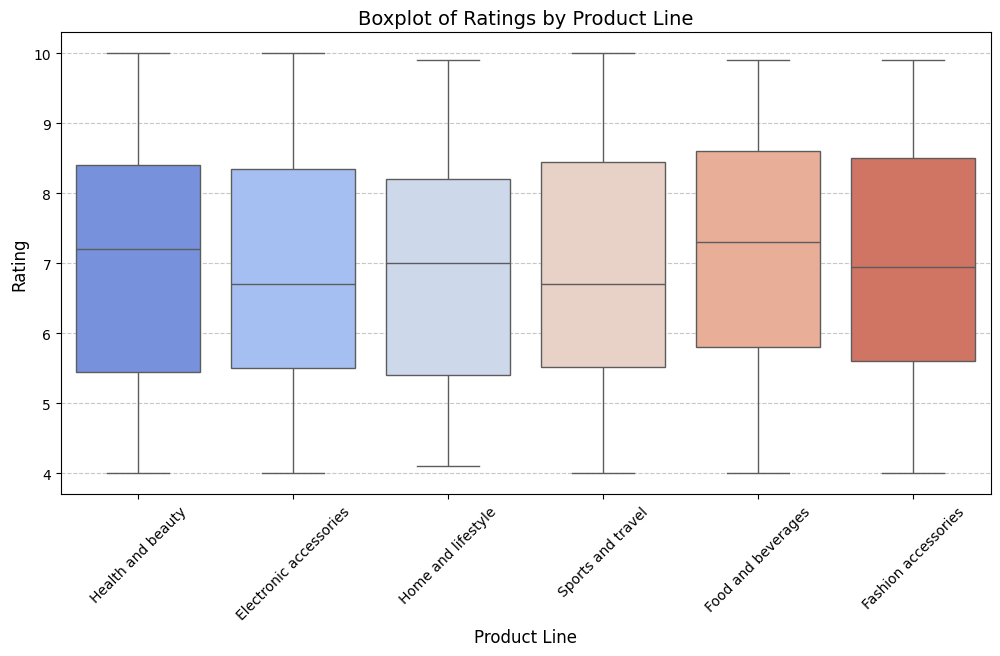

In [38]:
# Set appropriate figure size
plt.figure(figsize=(12, 6))  

# Create Boxplot
ax = sns.boxplot(x="Product line", y="Rating", data=df, palette="coolwarm")

# Labels & Title
plt.xlabel("Product Line", fontsize=12)
plt.ylabel("Rating", fontsize=12)
plt.title("Boxplot of Ratings by Product Line", fontsize=14)

# Rotate X labels if needed
plt.xticks(rotation=45)

# Add grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

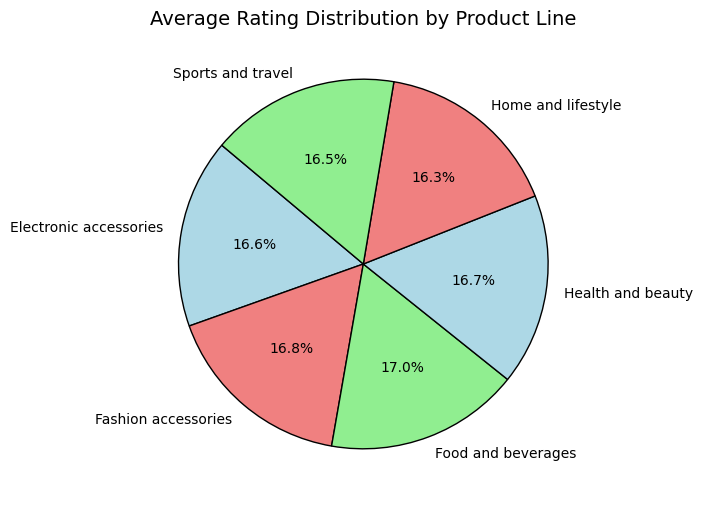

In [40]:
# Compute Average Rating per Product Line
avg_rating = df.groupby("Product line")["Rating"].mean()

# Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(avg_rating, labels=avg_rating.index, autopct="%1.1f%%", startangle=140, 
        colors=["lightblue", "lightcoral", "lightgreen"], wedgeprops={'edgecolor': 'black'})

# Title
plt.title("Average Rating Distribution by Product Line", fontsize=14)

# Show Plot
plt.show()